In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [ ]:
# count the number of images in the classes here, 0= tumour; 1= no tumour
ROOT_DIR = r'C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\Training Data'
number_of_img ={}

for dir in os.listdir(ROOT_DIR):
    number_of_img[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
    
    #print(number_of_img.items())

We will **split data** in such a manner that:

**70%** of the data will be used for **training**. 

**15%** of the data will be used for **validation**. 

**15%** of the data will be used for **testing**.

In [ ]:
# we will create a training folder

def dataFolderCreator(path, split):

    if not os.path.exists('./'+path):
        os.makedirs('./'+path)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+path+"/"+dir)
            for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(split * number_of_img[dir])-5), replace=False):
        
                o= os.path.join(ROOT_DIR, dir, img) #path
                D= os.path.join("./"+path,dir)
                shutil.copy(o, D) #copy the file to the new folder
                
                # os.remove(o) -> (uncomment this line to remove the original file after copying) 

    else:
        print(f"{path} folder exists")

In [ ]:
dataFolderCreator('TrainingData', 0.7)
dataFolderCreator('ValidationData', 0.15)
dataFolderCreator('TestingData', 0.15)



## *Model Building*

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Model

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


In [ ]:
# Model Compilation

model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

Preparing our Data using DataGenerator

In [ ]:
#Training Data
def preProcessingImage1(path):
    ''' Input: Path of the image
    Output: Preprocessed image
    '''
    
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True) #data augmentation
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
    
    return image

In [ ]:
training_data = preProcessingImage1(r'C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\Training Data')

In [ ]:
# Validation Data
def preProcessingImage2(path):
    ''' Input: Path of the image
    Output: Preprocessed image
    '''
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
    
    return image

In [ ]:
test_data = preProcessingImage2(r'C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\TestingData')

val_data = preProcessingImage2(r'C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\ValidationData')

In [ ]:
# Early Stopping and Model Checkpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta= 0.01, patience=3, verbose=1, mode='auto')

# Model Checkpoint
model_checkpoint = ModelCheckpoint(filepath='./best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1, mode='auto')

callBacks = [early_stopping, model_checkpoint]

## *Model Training*

In [53]:
# Model Training

History = model.fit(training_data, steps_per_epoch=8, epochs=30, verbose=1, validation_data=val_data, validation_steps=16, callbacks=callBacks)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6108 - loss: 0.6610
Epoch 1: val_accuracy did not improve from 0.73913
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6171 - loss: 0.6581 - val_accuracy: 0.6856 - val_loss: 0.5716
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6941 - loss: 0.5860
Epoch 2: val_accuracy improved from 0.73913 to 0.75585, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6956 - loss: 0.5863 - val_accuracy: 0.7559 - val_loss: 0.5333
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7305 - loss: 0.5635
Epoch 3: val_accuracy did not improve from 0.75585
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7287 - loss: 0.5669 - val_accuracy: 0.6455 - val_loss: 0.5836
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6795 - loss: 0.6250
Epoch 4: val_accuracy improved from 0.75585 to 0.76923, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6839 - loss: 0.6223 - val_accuracy: 0.7692 - val_loss: 0.5508
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7261 - loss: 0.5483
Epoch 5: val_accuracy did not improve from 0.76923
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7292 - loss: 0.5467 - val_accuracy: 0.7458 - val_loss: 0.5214
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7213 - loss: 0.5718
Epoch 6: val_accuracy did not improve from 0.76923
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7206 - loss: 0.5720 - val_accuracy: 0.7625 - val_loss: 0.5175
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7416 - loss: 0.5508
Epoch 7: val_accuracy did not improve from 0.76923
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7408 - loss: 0.5498 - val_accuracy: 0.7291 - val_loss: 0.5538
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7332 - loss: 0.5369
Epoch 8: val_accuracy did not improve from 0.76923
8/8 ━━━━━━━━━━━━━━━━

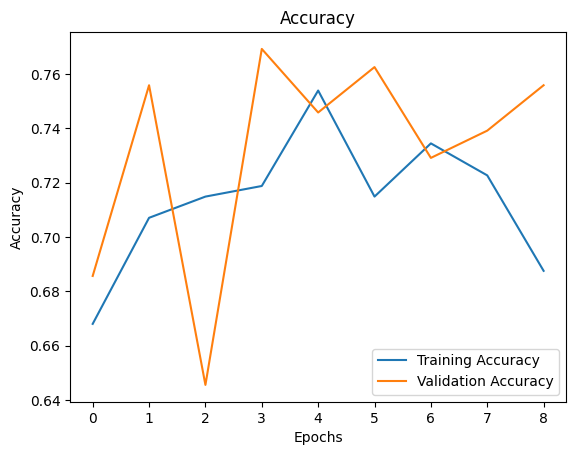

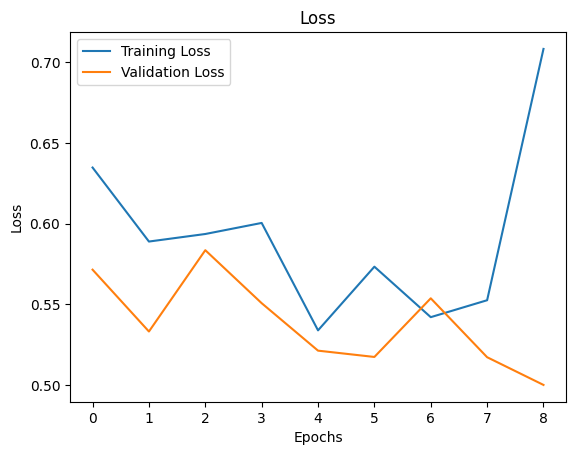

In [ ]:
# Model Graphical Representation

h= History.history
h.keys()

# Plotting Accuracy

plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.show() -> remove '#' to see the accuracy graph

# Plotting Loss
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show() -> remove '#' to see the loss graph

In [ ]:
# Loading the best model

from keras.models import load_model

model = load_model(r'C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\best_model.h5')

## *Model Accuracy*

In [60]:
acc = model.evaluate(test_data)

print(f"Accuracy of our model is: ", (acc[1] * 100), "%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.7409 - loss: 0.5055
Accuracy of our model is:  76.25418305397034 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


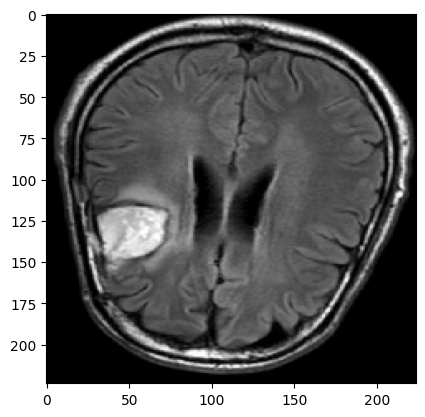

{'no': 0, 'yes': 1}

In [68]:
# to check if a random image has tumour or not

from keras.preprocessing.image import load_img, img_to_array

path=r"C:\Users\lenovo\Desktop\Code\Mini Project\Tumour Detection\Training Data\yes\aug_Y7_0_1219.jpg"

img= load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255
input_arr = np.expand_dims(input_arr, axis=0)

prediction = model.predict(input_arr)[0][0]

plt.imshow(img)
plt.show()

# to check the class indices of the training data
training_data.class_indices